In [2]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [3]:
#Read csv to pandas
birth_data = pd.read_csv('../Data/us_births_2016_2021.csv')
birth_data.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


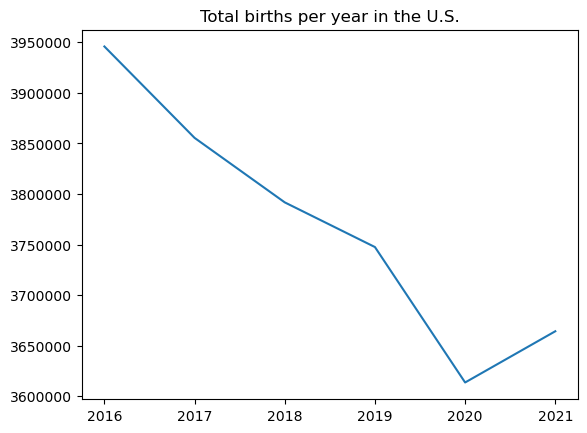

In [4]:
#Plot total births in the country from 2016 to 2021
total_births_per_year = birth_data.groupby('Year')['Number of Births'].sum()

plt.ticklabel_format(style='plain')
plt.title("Total births per year in the U.S.")
plt.plot(total_births_per_year.index, total_births_per_year)
#Save Image
plt.savefig("../Visuals/TotalBirthsUS.png")
plt.show()

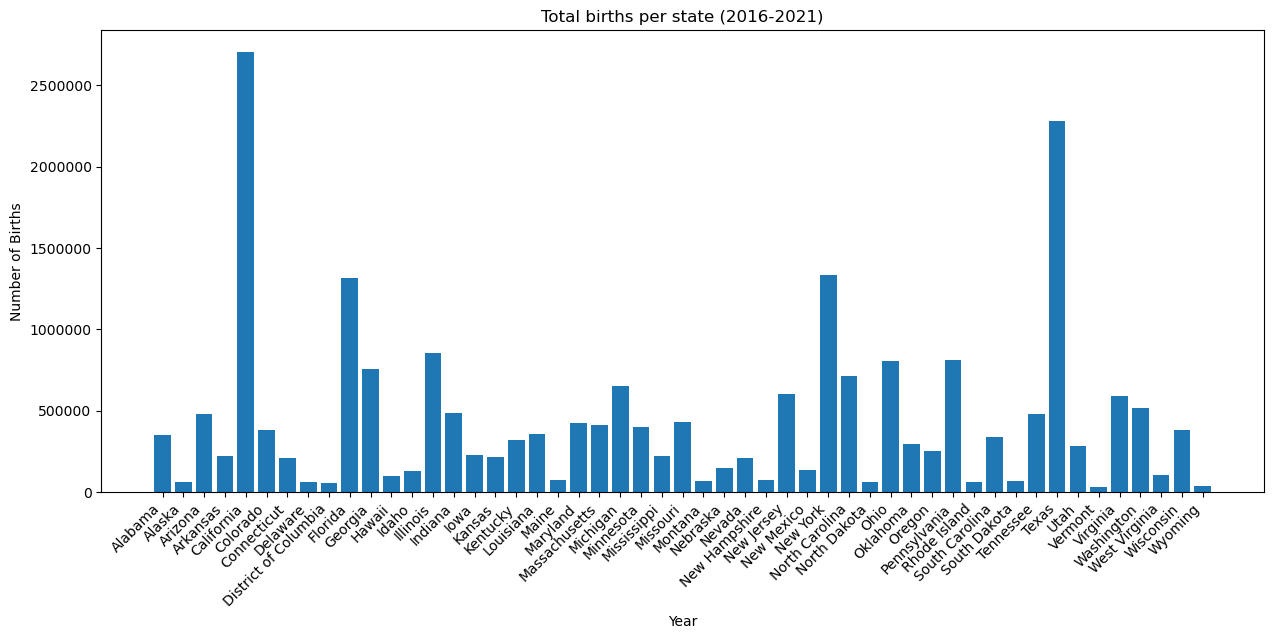

,State,Number of Births
0,Alabama,350169
1,Alaska,60398
2,Arizona,481353
3,Arkansas,220592
4,California,2702751


In [5]:
#Grouping all rows for each state together to make a new dataframe
birth_data_state = pd.DataFrame(birth_data.groupby('State')['Number of Births'].sum())
birth_data_state = birth_data_state.reset_index()
#This bar chart shows total number of births for each state from 2016 to 2021
plt.figure(figsize=(15,6))
plt.ticklabel_format(style='plain')
plt.title("Total births per state (2016-2021)")
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.xticks(rotation=45, ha='right')
plt.bar(birth_data_state['State'], birth_data_state['Number of Births'])
#Save Image
plt.savefig("../Visuals/TotalBirthsbyState.png")
plt.show()
#check new dataframe
birth_data_state.head(5)

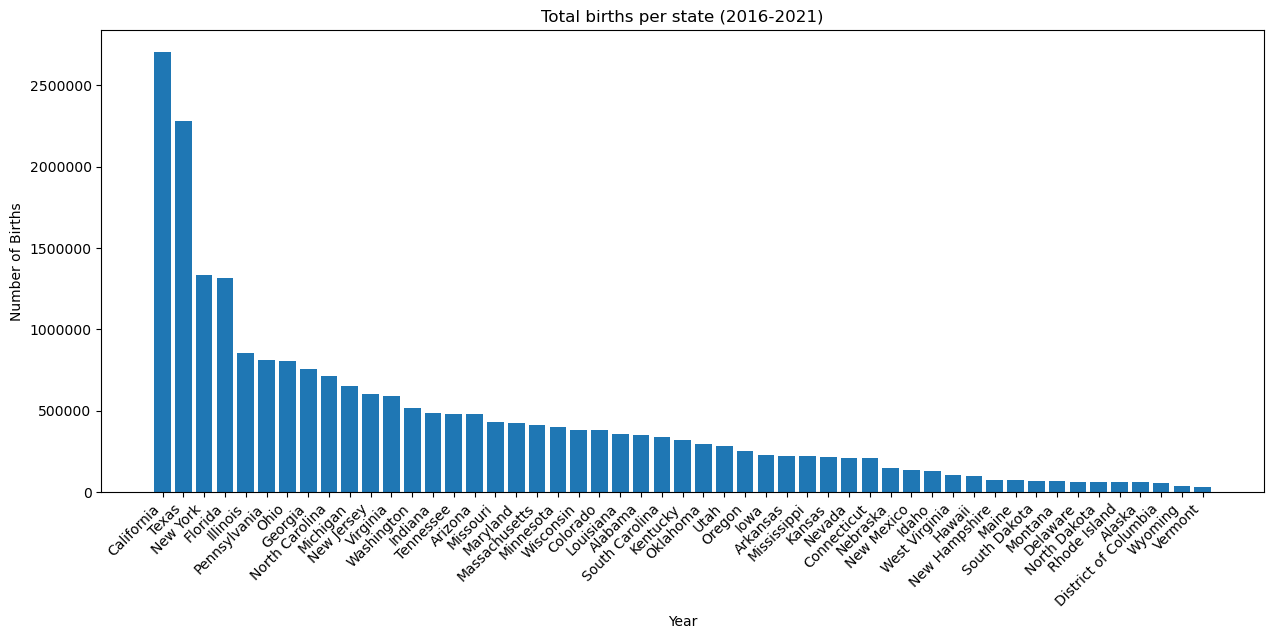

,State,Number of Births
4,California,2702751
43,Texas,2278104
32,New York,1331877
9,Florida,1316127
13,Illinois,854265


In [6]:
#This bar chart shows total number of births for each state from 2016 to 2021
#Sorted from largest to greatest instead of alphabetical order
sorted_birth_data_state =  birth_data_state.sort_values(['Number of Births'], ascending=False)
#Plot parametes
plt.figure(figsize=(15,6))
plt.ticklabel_format(style='plain')
plt.title("Total births per state (2016-2021)")
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.xticks(rotation=45, ha='right')
plt.bar(sorted_birth_data_state['State'], sorted_birth_data_state['Number of Births'])
#Save Image
plt.savefig("../Visuals/TotalBirthsbyStateSorted.png")
plt.show()
#check new dataframe
sorted_birth_data_state.head()


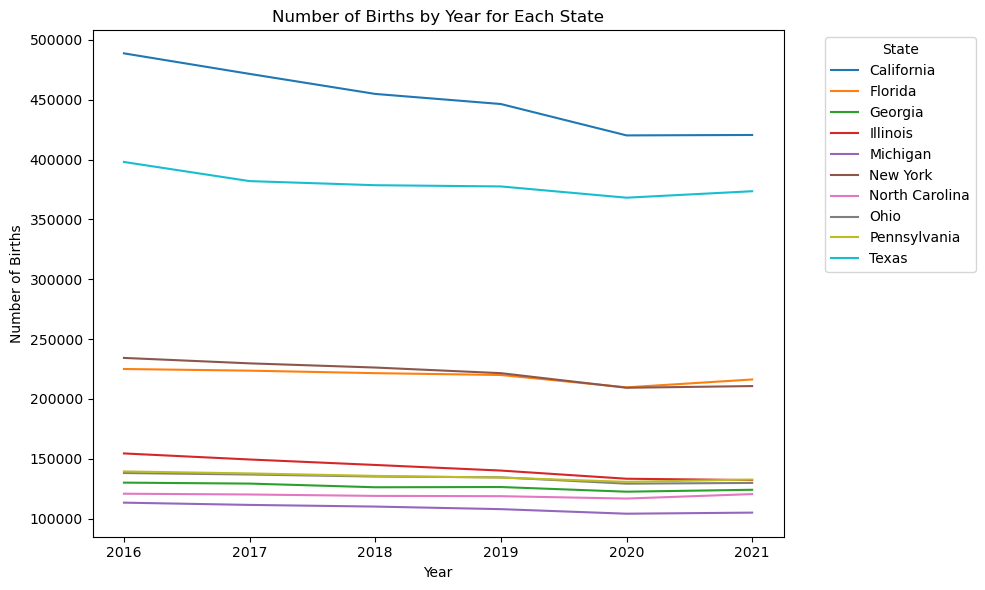

In [7]:
#Create dataframe to look at total births per year per state, only select top 10 states
birth_data_SY = pd.DataFrame(birth_data.groupby(['State','Year'])['Number of Births'].sum()).reset_index().nlargest(60, 'Number of Births')
# Pivot the dataframe 
pivot_df = birth_data_SY.pivot(index='Year', columns='State', values='Number of Births')
# Loop through each state and plot its data
plt.figure(figsize=(10, 6))
for state in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[state], label=state)
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Number of Births by Year for Each State')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.tight_layout()
#Save Image
plt.savefig("../Visuals/BirthsbyStateandYear.png")
plt.show()


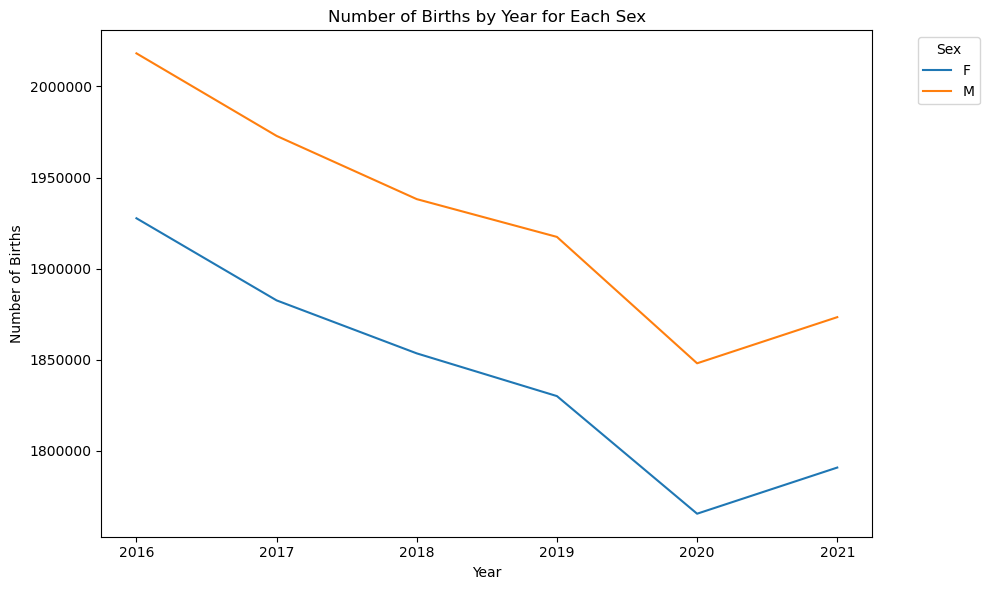

In [8]:
#Create dataframe to compare sex of newborns from 2016-2021
birth_data_YG = pd.DataFrame(birth_data.groupby(['Gender','Year'])['Number of Births'].sum()).reset_index()
# Pivot the dataframe
pivot_df = birth_data_YG.pivot(index='Year', columns='Gender', values='Number of Births')
# Loop through each sex and plot its data
plt.figure(figsize=(10, 6))
for gender in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[gender], label=gender)
# Add labels and title
plt.ticklabel_format(style='plain')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Number of Births by Year for Each Sex')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.tight_layout()
#Save Image
plt.savefig("../Visuals/BirthsbyYearandSex.png")
plt.show()


In [9]:
#Create dataframe to look at the change in number of births from each year and the total change
# Filter the DataFrame to include only data from 2018 to 2021
years = [2018,2019,2020,2021]
df_filtered = birth_data[birth_data['Year'].isin(years)]
# Pivot the table
pivot_df = df_filtered.pivot_table(index='State', columns='Year', values='Number of Births')
pivot_df['change_2018_2019'] = pivot_df[2019] - pivot_df[2018]
pivot_df['change_2019_2020'] = pivot_df[2020] - pivot_df[2019]
pivot_df['change_2020_2021'] = pivot_df[2021] - pivot_df[2020]

#Use standard deviation to measure variation in births
pivot_df['total_change_std'] = pivot_df[[2018, 2019, 2020, 2021]].std(axis=1)
# Find the state with the most change
most_change_state = pivot_df['total_change_std'].idxmax()
most_change_value = pivot_df['total_change_std'].max()

print(f"The state with the most amount of change in births from 2018 to 2021 is {most_change_state} with a standard deviation of {most_change_value}.")

pivot_df = pivot_df.sort_values(by='total_change_std', ascending=False)
pivot_df.head()


The state with the most amount of change in births from 2018 to 2021 is California with a standard deviation of 989.5112986127571.


Year,2018,2019,2020,2021,change_2018_2019,change_2019_2020,change_2020_2021,total_change_std
State,,,,,,,,
California,25273.333333,24804.388889,23347.722222,23367.111111,-468.944444,-1456.666667,19.388889,989.511299
New York,12568.777778,12307.722222,11629.888889,11707.888889,-261.055556,-677.833333,78.000000,457.905930
Illinois,8045.277778,7784.888889,7405.444444,7343.833333,-260.388889,-379.444444,-61.611111,330.595094
Florida,12307.888889,12222.333333,11648.388889,12014.444444,-85.555556,-573.944444,366.055556,293.682982
Texas,21034.666667,20977.722222,20455.000000,20755.222222,-56.944444,-522.722222,300.222222,263.030966


In [10]:
# Load the dataset
df = pd.read_csv('../Data/us_births_2016_2021.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

     State State Abbreviation  Year Gender  \
0  Alabama                 AL  2016      F   
1  Alabama                 AL  2016      F   
2  Alabama                 AL  2016      F   
3  Alabama                 AL  2016      F   
4  Alabama                 AL  2016      F   

                Education Level of Mother  Education Level Code  \
0                       8th grade or less                     1   
1  9th through 12th grade with no diploma                     2   
2   High school graduate or GED completed                     3   
3   Some college credit, but not a degree                     4   
4               Associate degree (AA, AS)                     5   

   Number of Births  Average Age of Mother (years)  Average Birth Weight (g)  
0              1052                           27.8                    3116.9  
1              3436                           24.1                    3040.0  
2              8777                           25.4                    3080.0  
3   

In [11]:
# Describe the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

              Year  Education Level Code  Number of Births  \
count  5496.000000           5496.000000       5496.000000   
mean   2018.500728              3.026201       4115.443959   
std       1.707554              4.733406       6687.036797   
min    2016.000000             -9.000000         10.000000   
25%    2017.000000              2.000000        559.000000   
50%    2019.000000              4.000000       1692.000000   
75%    2020.000000              6.000000       5140.000000   
max    2021.000000              8.000000      59967.000000   

       Average Age of Mother (years)  Average Birth Weight (g)  
count                    5496.000000               5496.000000  
mean                       29.552274               3250.887627  
std                         2.779735                114.456090  
min                        23.100000               2451.900000  
25%                        27.500000               3182.200000  
50%                        29.600000               

In [12]:
ed_numb_df=df[["Education Level of Mother", "Number of Births"]]
ed_numb_df

,Education Level of Mother,Number of Births
0,8th grade or less,1052
1,9th through 12th grade with no diploma,3436
2,High school graduate or GED completed,8777
3,"Some college credit, but not a degree",6453
4,"Associate degree (AA, AS)",2227
...,...,...
5491,"Associate degree (AA, AS)",401
5492,"Bachelor's degree (BA, AB, BS)",657
5493,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",261
5494,"Doctorate (PhD, EdD) or Professional Degree (M...",72


C:\Users\micah\AppData\Local\Temp\ipykernel_21468\1617658874.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


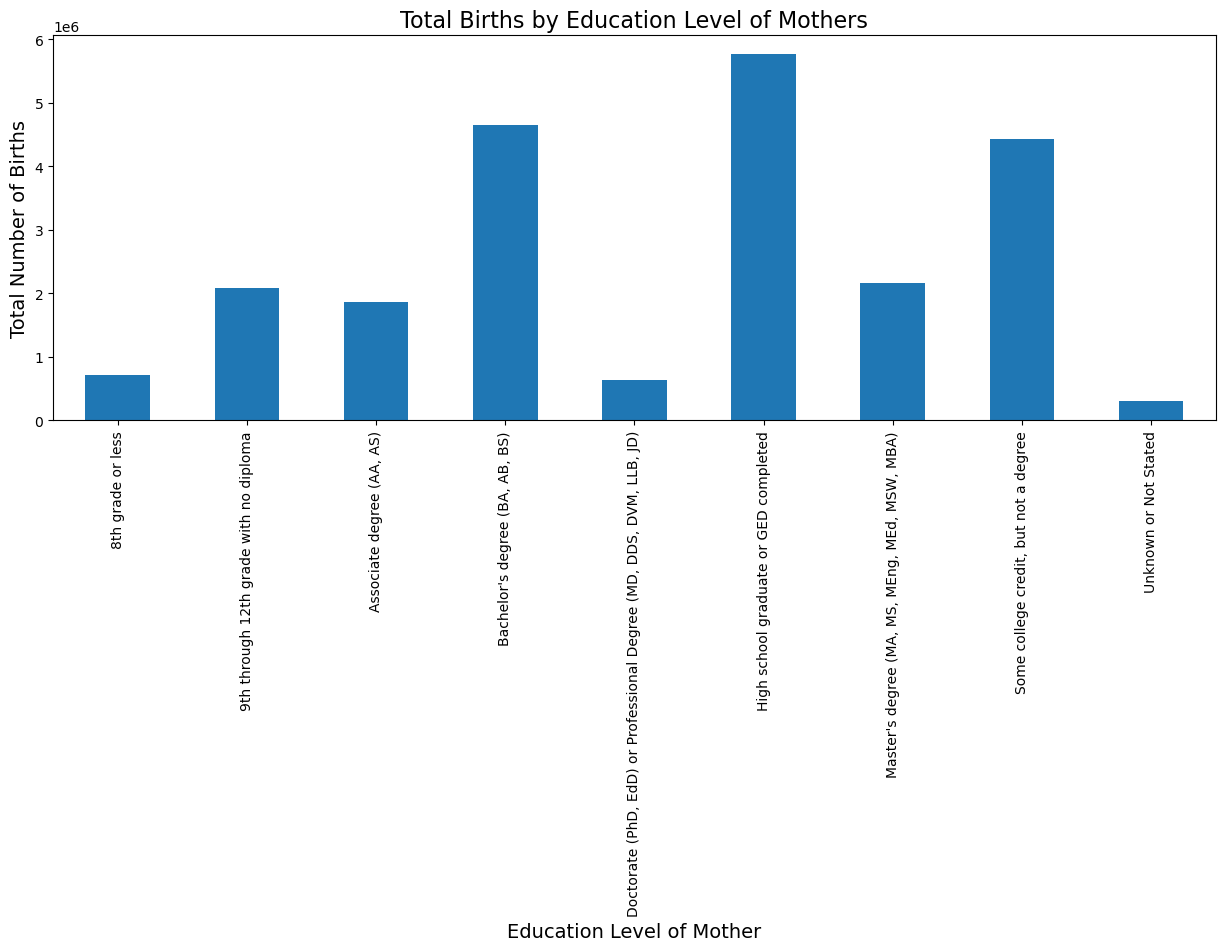

In [13]:
# Grouping data
education_level = df.groupby('Education Level of Mother')['Number of Births'].sum()

# Creating the bar chart
plt.figure(figsize=(15, 5))
education_level.plot(kind='bar')

# Adding title and labels
plt.title('Total Births by Education Level of Mothers', fontsize=16)
plt.ylabel('Total Number of Births', fontsize=14)
plt.xlabel('Education Level of Mother', fontsize=14)

# Show the plot
plt.tight_layout()
#Save Image
plt.savefig("../Visuals/TotalBirthsbyEducation.png")
plt.show()

In [14]:
ed_numb_state_df=df[["State","Education Level of Mother", "Number of Births"]]
ed_numb_state_df

,State,Education Level of Mother,Number of Births
0,Alabama,8th grade or less,1052
1,Alabama,9th through 12th grade with no diploma,3436
2,Alabama,High school graduate or GED completed,8777
3,Alabama,"Some college credit, but not a degree",6453
4,Alabama,"Associate degree (AA, AS)",2227
...,...,...,...
5491,Wyoming,"Associate degree (AA, AS)",401
5492,Wyoming,"Bachelor's degree (BA, AB, BS)",657
5493,Wyoming,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",261
5494,Wyoming,"Doctorate (PhD, EdD) or Professional Degree (M...",72


In [15]:
all_education= ed_numb_state_df['Education Level of Mother'].unique()
all_education

array(['8th grade or less', '9th through 12th grade with no diploma',
       'High school graduate or GED completed',
       'Some college credit, but not a degree',
       'Associate degree (AA, AS)', "Bachelor's degree (BA, AB, BS)",
       "Master's degree (MA, MS, MEng, MEd, MSW, MBA)",
       'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)',
       'Unknown or Not Stated'], dtype=object)

In [16]:
all_states= ed_numb_state_df['State'].unique()
all_states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

C:\Users\micah\AppData\Local\Temp\ipykernel_21468\230779629.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

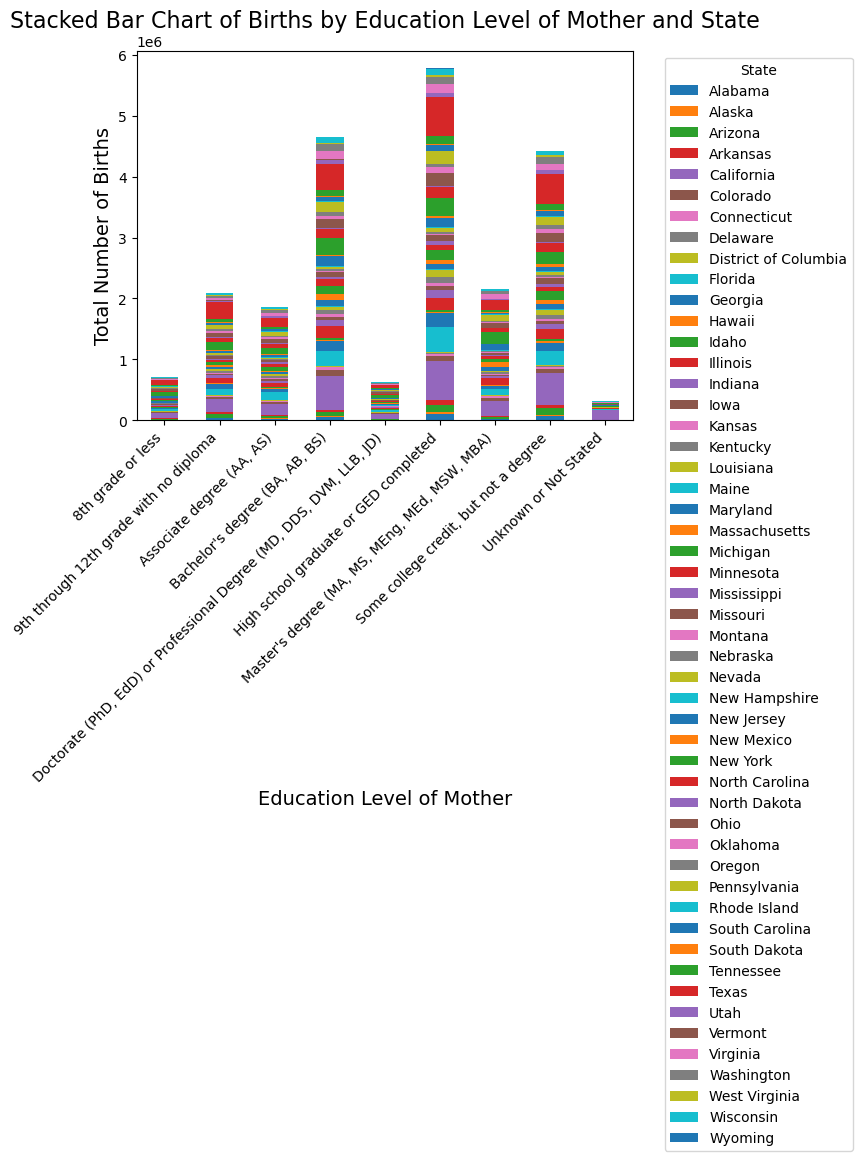

In [17]:
# List all unique states and education levels
all_states = ed_numb_state_df['State'].unique()
all_education_levels = ed_numb_state_df['Education Level of Mother'].unique()

# Grouping the data by education level and state
bar_chart_stacked = ed_numb_state_df.groupby(['Education Level of Mother', 'State'])['Number of Births'].sum().unstack()

# Fill missing values with 0 to ensure all states are represented
bar_chart_stacked = bar_chart_stacked.reindex(all_states, axis=1).fillna(0)

# Creating the stacked bar chart
plt.figure(figsize=(10, 6))
bar_chart_stacked.plot(kind='bar', stacked=True, color=plt.cm.tab10.colors)

# Adding title and labels
plt.title('Stacked Bar Chart of Births by Education Level of Mother and State', fontsize=16)
plt.xlabel('Education Level of Mother', fontsize=14)
plt.ylabel('Total Number of Births', fontsize=14)

# Rotate x-tick labels if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
#Save Image
plt.savefig("../Visuals/BirthsbyEducationandState.png")
plt.show()

<Figure size 1000x1500 with 0 Axes>

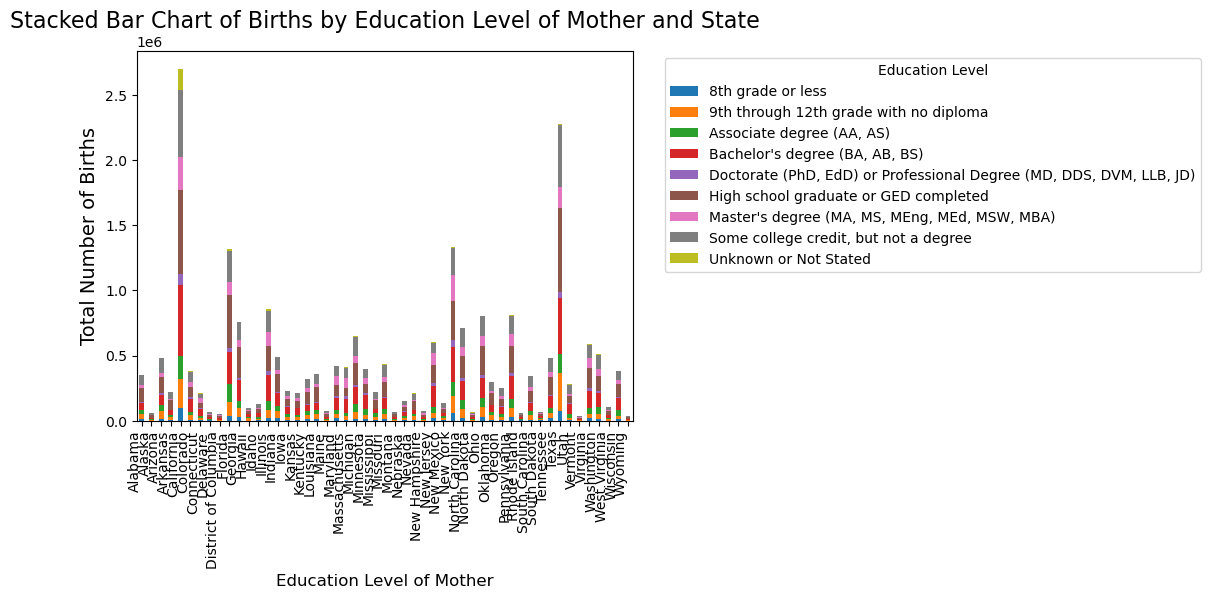

In [18]:
all_states = ed_numb_state_df['State'].unique()
all_education_levels = ed_numb_state_df['Education Level of Mother'].unique()

# Grouping the data by education level and state
bar_chart_stacked = ed_numb_state_df.groupby(['State','Education Level of Mother'])['Number of Births'].sum().unstack()


# Creating the stacked bar chart
plt.figure(figsize=(10, 15))
bar_chart_stacked.plot(kind='bar', stacked=True, color=plt.cm.tab10.colors)

# Adding title and labels
plt.title('Stacked Bar Chart of Births by Education Level of Mother and State', fontsize=16)
plt.xlabel('Education Level of Mother', fontsize=12)
plt.ylabel('Total Number of Births', fontsize=14)

# Rotate x-tick labels if necessary
plt.xticks(rotation=90, ha='right')

# Show the plot

plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
#Save Image
plt.savefig("../Visuals/BirthsbyStateandEducation.png")
plt.show()

In [19]:
ed_age_df=df[["Education Level of Mother", 'Average Age of Mother (years)']]
ed_age_df

,Education Level of Mother,Average Age of Mother (years)
0,8th grade or less,27.8
1,9th through 12th grade with no diploma,24.1
2,High school graduate or GED completed,25.4
3,"Some college credit, but not a degree",26.7
4,"Associate degree (AA, AS)",28.9
...,...,...
5491,"Associate degree (AA, AS)",29.2
5492,"Bachelor's degree (BA, AB, BS)",30.7
5493,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",33.0
5494,"Doctorate (PhD, EdD) or Professional Degree (M...",33.3


C:\Users\micah\AppData\Local\Temp\ipykernel_21468\175123533.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


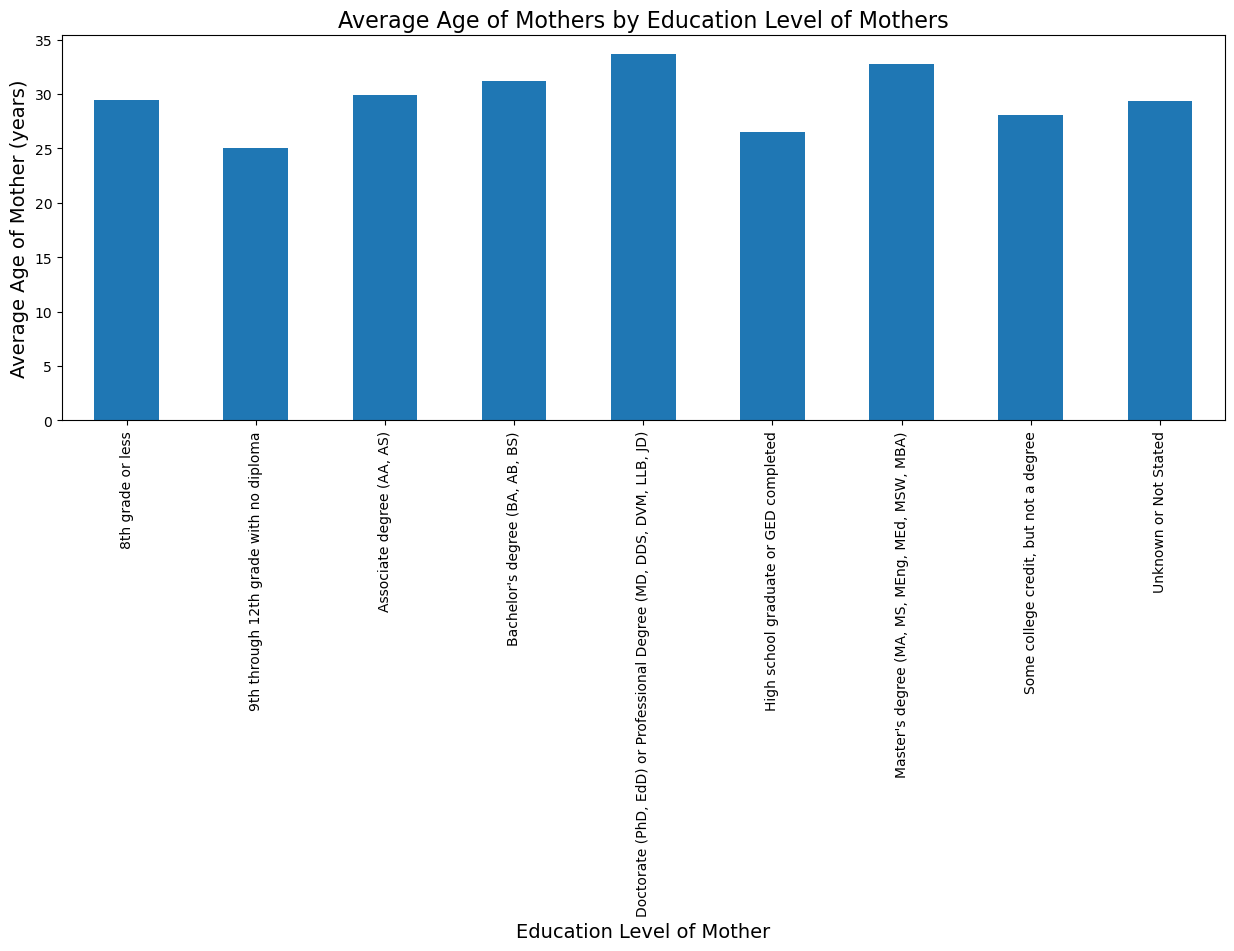

In [20]:
education_level = df.groupby('Education Level of Mother') ['Average Age of Mother (years)'].mean()

# Creating the bar chart
plt.figure(figsize=(15, 5))
education_level.plot(kind='bar')

# Adding title and labels
plt.title('Average Age of Mothers by Education Level of Mothers', fontsize=16)
plt.ylabel('Average Age of Mother (years)', fontsize=14)
plt.xlabel('Education Level of Mother', fontsize=14)

# Show the plot
plt.tight_layout()
#Save Image
plt.savefig("../Visuals/AverageAgeofMothers.png")
plt.show()

In [21]:
age_weight_df=df[['Average Birth Weight (g)', 'Average Age of Mother (years)']]
age_weight_df

,Average Birth Weight (g),Average Age of Mother (years)
0,3116.9,27.8
1,3040.0,24.1
2,3080.0,25.4
3,3121.9,26.7
4,3174.3,28.9
...,...,...
5491,3261.1,29.2
5492,3286.0,30.7
5493,3249.3,33.0
5494,3262.0,33.3


In [26]:
df = pd.read_csv('../Data/us_births_2016_2021.csv')


df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [27]:
# Summary statistics for 'Average Age of Mother (years)' and 'Average Birth Weight (g)'
df[['Average Age of Mother (years)','Average Birth Weight (g)']].describe()

,Average Age of Mother (years),Average Birth Weight (g)
count,5496.000000,5496.000000
mean,29.552274,3250.887627
std,2.779735,114.456090
min,23.100000,2451.900000
25%,27.500000,3182.200000
50%,29.600000,3256.000000
75%,31.800000,3330.825000
max,35.500000,3585.700000


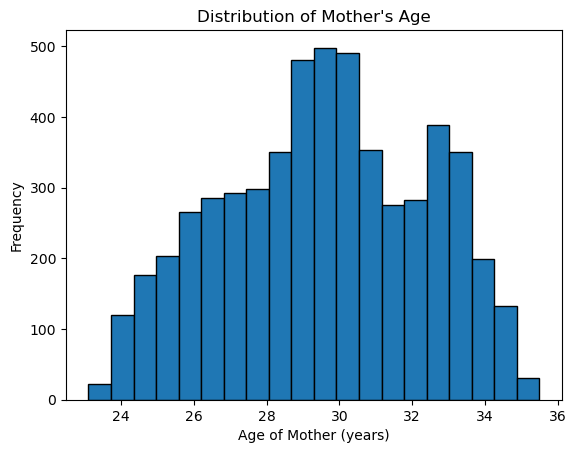

In [28]:
# Plot the distribution of mother's age
plt.hist(df['Average Age of Mother (years)'], bins=20, edgecolor='black')
plt.title('Distribution of Mother\'s Age')
plt.xlabel('Age of Mother (years)')
plt.ylabel('Frequency')
#Save Image
plt.savefig("../Visuals/DistributionofMothersAge.png")
plt.show()

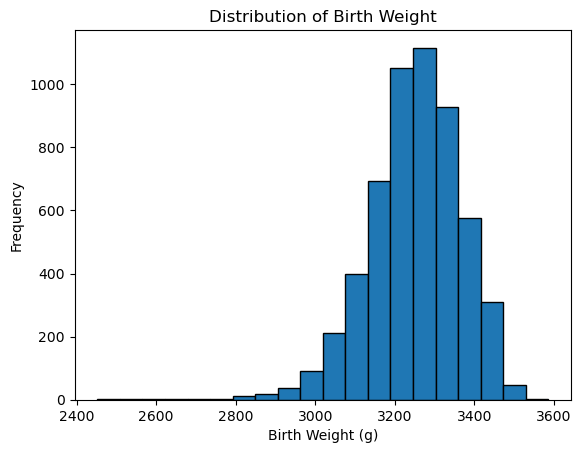

In [29]:
# Plot the distribution of birth weight
plt.hist(df['Average Birth Weight (g)'], bins=20, edgecolor='black')
plt.title('Distribution of Birth Weight')
plt.xlabel('Birth Weight (g)')
plt.ylabel('Frequency')
#Save Image
plt.savefig("../Visuals/DistributionofBirthWeight.png")
plt.show()

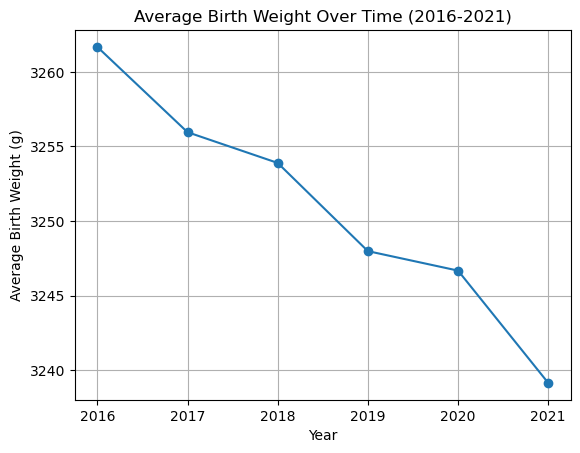

In [30]:
# Group by Year and calculate the average birth weight for each year
avg_birth_weight_by_year = df.groupby('Year')['Average Birth Weight (g)'].mean()

# Plot the trend over time
plt.plot(avg_birth_weight_by_year.index, avg_birth_weight_by_year.values, marker='o')
plt.title('Average Birth Weight Over Time (2016-2021)')
plt.xlabel('Year')
plt.ylabel('Average Birth Weight (g)')
plt.grid(True)
#Save Image
plt.savefig("../Visuals/AverageBirthWeightbyYear.png")
plt.show()

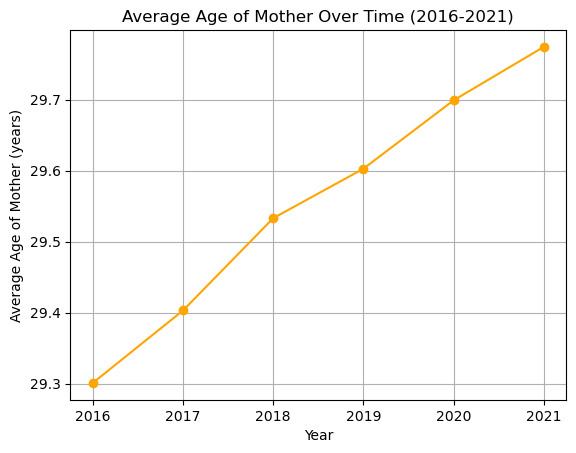

In [31]:
# Group by Year and calculate the average mother's age for each year
avg_age_by_year = df.groupby('Year')['Average Age of Mother (years)'].mean()

# Plot the trend over time
plt.plot(avg_age_by_year.index, avg_age_by_year.values, marker='o', color='orange')
plt.title('Average Age of Mother Over Time (2016-2021)')
plt.xlabel('Year')
plt.ylabel('Average Age of Mother (years)')
plt.grid(True)
#Save Image
plt.savefig("../Visuals/AverageMothersAgebyYear.png")
plt.show()

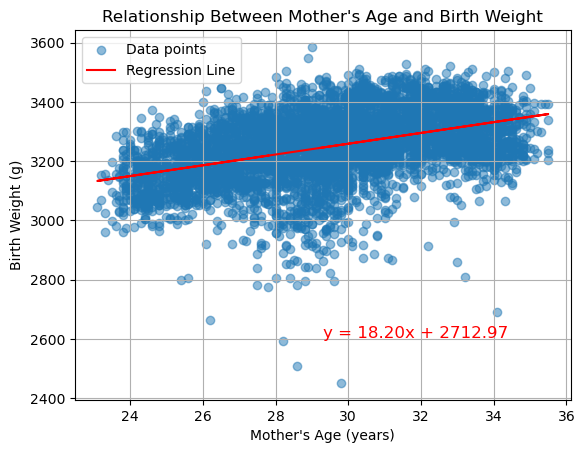

In [32]:
# Scatter plot of mother's age vs. birth weight
plt.scatter(df['Average Age of Mother (years)'], df['Average Birth Weight (g)'], alpha=0.5, label='Data points')

# Calculate the line of best fit
x = df['Average Age of Mother (years)']
y = df['Average Birth Weight (g)']

# Use numpy to get the slope and intercept of the regression line
slope, intercept = np.polyfit(x, y, 1)

# Plot the regression line
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 0.2, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='red')

# Add labels and title
plt.title('Relationship Between Mother\'s Age and Birth Weight')
plt.xlabel('Mother\'s Age (years)')
plt.ylabel('Birth Weight (g)')
plt.grid(True)

# Add a legend to distinguish data points and regression line
plt.legend()

# Show the plot
#Save Image
plt.savefig("../Visuals/MotherAgeandBabyWeightScatter.png")
plt.show()

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# Load the datasets
# The births dataset contains information on births in the US from 2016 to 2021
births_df = pd.read_csv('../Data/us_births_2016_2021.csv')
# The regions dataset contains information on US state divisions and regions
regions_df = pd.read_csv('../Data/US State Divison Regions.csv')

In [4]:
# Merge datasets
# This step combines the birth data with regional information based on state abbreviations
merged_df = pd.merge(births_df, regions_df[['State Code', 'Division', 'Region']], left_on='State Abbreviation', right_on='State Code')

In [5]:
# Show the merged dataframe
merged_df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g),State Code,Division,Region
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9,AL,South,East South Central
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0,AL,South,East South Central
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0,AL,South,East South Central
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9,AL,South,East South Central
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3,AL,South,East South Central


In [ ]:
# Export the merged dataframe to a CSV file, rename the file to 'merged_us_births_2016_2021.csv'
merged_df.to_csv('../Data/merged_us_births_2016_2021.csv', index=False)

In [6]:
# Aggregate births by state, year, and region
# This step sums up the number of births for each state, year, and region combination
agg_df = merged_df.groupby(['State', 'Year', 'Region'])['Number of Births'].sum().reset_index()

In [7]:
# Show the aggregated dataframe
agg_df.head()

,State,Year,Region,Number of Births
0,Alabama,2016,East South Central,59151
1,Alabama,2017,East South Central,58941
2,Alabama,2018,East South Central,57761
3,Alabama,2019,East South Central,58615
4,Alabama,2020,East South Central,57647


In [8]:
# Calculate total births by region and year
# This provides an overview of birth trends for each region over time
region_year_births = agg_df.groupby(['Region', 'Year'])['Number of Births'].sum().reset_index()

# Show the region-year-births dataframe
region_year_births.head()

,Region,Year,Number of Births
0,East North Central,2016,555551
1,East North Central,2017,544793
2,East North Central,2018,535725
3,East North Central,2019,526604
4,East North Central,2020,505773


In [9]:
# Pivot the data for easier plotting
# This reshapes the data so that each region becomes a column, making it easier to create charts
pivot_df = region_year_births.pivot(index='Year', columns='Region', values='Number of Births')

# Show the pivoted dataframe
pivot_df.head()

Region,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
Year,,,,,,,,,
2016,555551,233335,476339,304699,148851,654135,748710,272142,552091
2017,544793,232066,468732,295245,146621,630813,741149,265258,530802
2018,535725,229434,463134,289016,144073,610251,732341,262676,525057
2019,526604,228770,455354,286800,142529,599851,727520,257856,522247
2020,505773,223477,437985,278137,138452,568419,704470,248528,508392


<Figure size 1800x800 with 0 Axes>

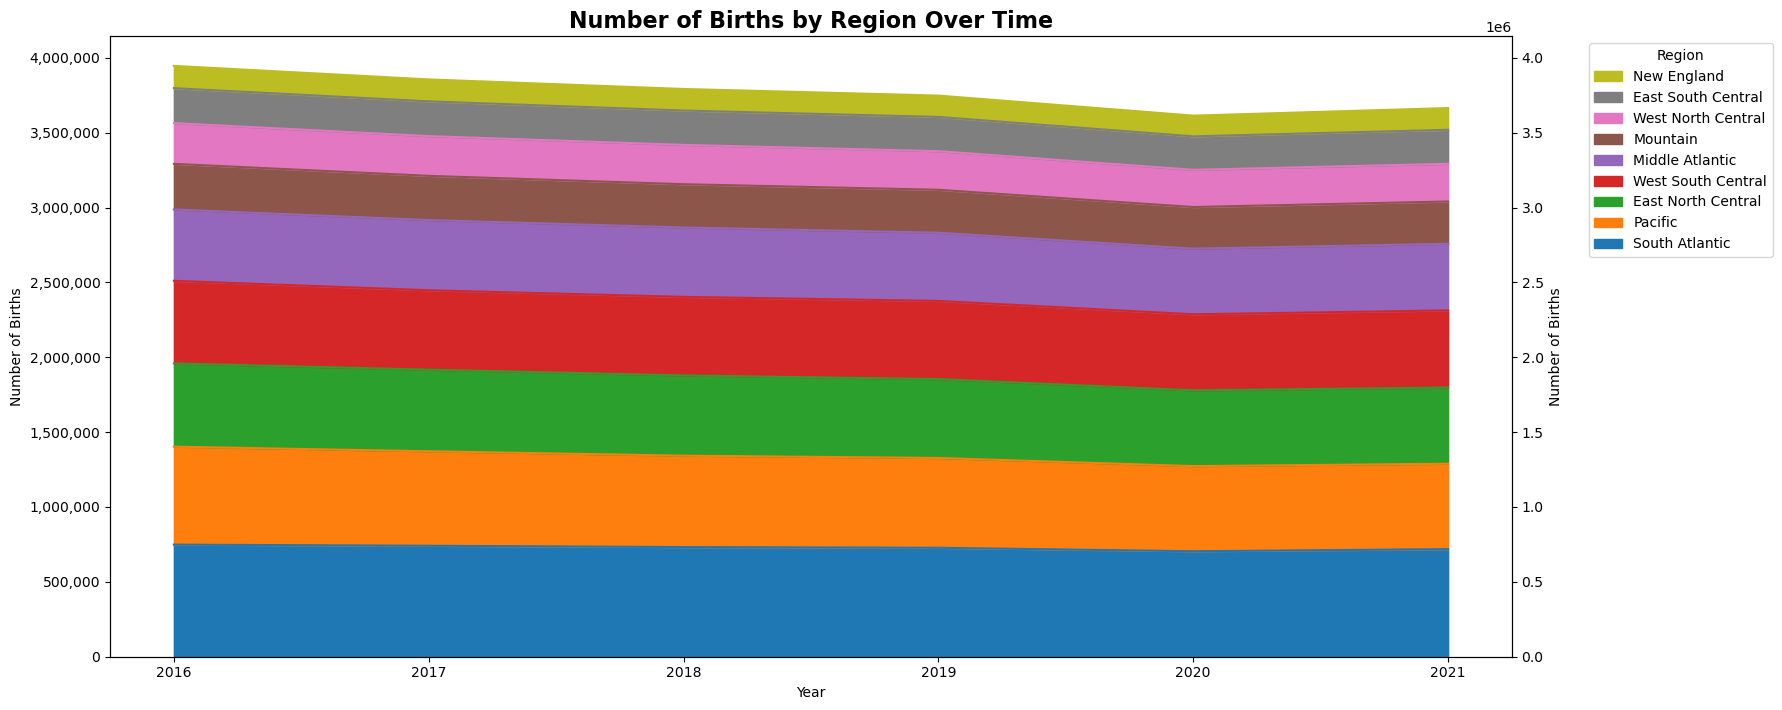

In [10]:
# Sort regions from highest births to lowest
sorted_regions = pivot_df.sum().sort_values(ascending=False).index

# Create a stacked area chart
plt.figure(figsize=(18, 8))  # Control the width to 18 for a wider x-axis
fig, ax1 = plt.subplots(figsize=(20, 8))
pivot_df[sorted_regions].plot(kind='area', stacked=True, ax=ax1)
ax1.set_title('Number of Births by Region Over Time', fontweight='bold', fontsize=16)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Births')

# Create legend with sorted regions
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a twin Axes sharing the x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Births')
ax2.set_ylim(ax1.get_ylim())  # Set the same y-axis limits as the left axis

# Add y-axis labels
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout to prevent cutting off y-axis labels
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

plt.savefig('../Visuals/stacked_area_chart.png')  # Save the figure to the Visuals folder
plt.show()  # Display the plot
plt.close()

In [11]:
# Create a choropleth map
# Create a dataframe of unique states from the 'State' column in the aggregated dataframe and keep the column name 'State'
unique_states = agg_df['State'].unique()

# Give the dataframe a name 'State'
unique_states = pd.DataFrame(unique_states, columns=['State'])

# Show unique_states dataframe
print(unique_states.head())

        State
0     Alabama
1      Alaska
2     Arizona
3    Arkansas
4  California


In [12]:
# Show agg_df dataframe
print(agg_df.head())

     State  Year              Region  Number of Births
0  Alabama  2016  East South Central             59151
1  Alabama  2017  East South Central             58941
2  Alabama  2018  East South Central             57761
3  Alabama  2019  East South Central             58615
4  Alabama  2020  East South Central             57647


In [13]:
# Show regions_df dataframe
print(regions_df.head())

   Index       State State Code Division              Region
0      1      Alaska         AK     West             Pacific
1      2     Alabama         AL    South  East South Central
2      3    Arkansas         AR    South  West South Central
3      4     Arizona         AZ     West            Mountain
4      5  California         CA     West             Pacific


In [14]:
# Calculate average births per year for each state
state_births = agg_df.groupby('State')['Number of Births'].mean().reset_index()
state_births = pd.merge(state_births, regions_df[['State', 'State Code']], on='State')

# Show state_births dataframe
print(state_births.head())

        State  Number of Births State Code
0     Alabama      58361.500000         AL
1      Alaska      10066.333333         AK
2     Arizona      80225.500000         AZ
3    Arkansas      36765.333333         AR
4  California     450458.500000         CA


In [15]:
# Create and show the choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=state_births['State Code'],
    z=state_births['Number of Births'].astype(float),
    locationmode='USA-states',
    colorscale='YlOrRd',
    colorbar_title="Average Annual Births"
))

# Update layout
fig.update_layout(
    title_text='Average Annual Births by State (2016-2021)',
    geo_scope='usa',
    geo=dict(
        projection=dict(
            type='albers usa',
            scale=1.1  # Increase the scale to make states bigger
        ),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'
    ),
    height=800  # Increase the height of the figure
)

# Show the map
fig.show()

             State  Number of Births State Code
4       California     450458.500000         CA
43           Texas     379684.000000         TX
32        New York     221979.500000         NY
9          Florida     219354.500000         FL
13        Illinois     142377.500000         IL
38    Pennsylvania     135062.000000         PA
35            Ohio     133915.666667         OH
10         Georgia     126395.666667         GA
33  North Carolina     119296.500000         NC
22        Michigan     108618.833333         MI


Text(0, 0.5, 'Average Annual Births')

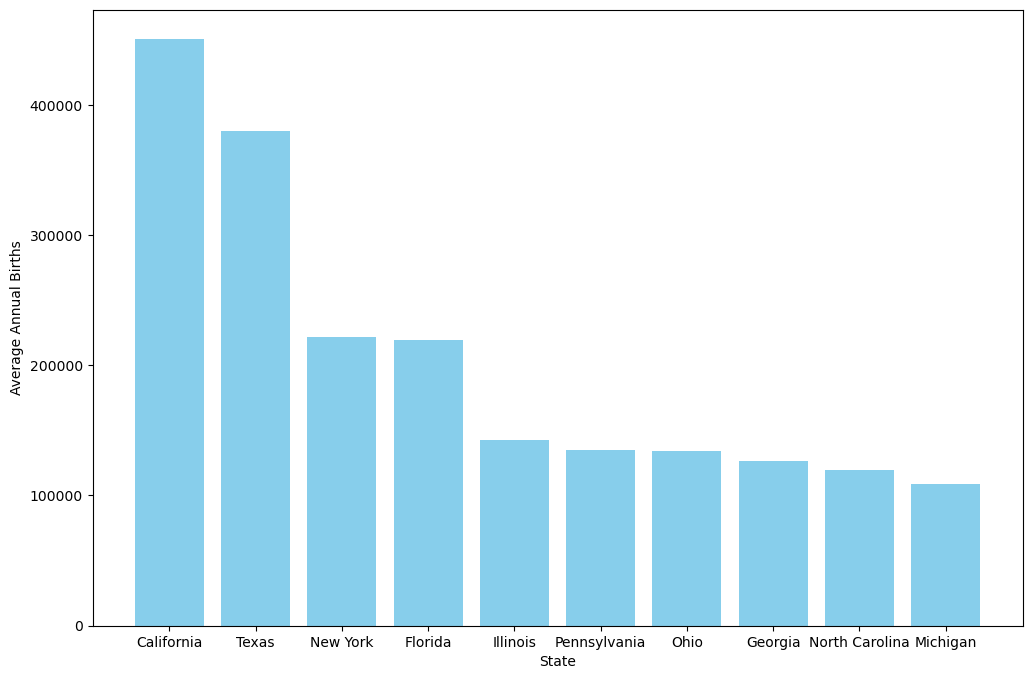

In [16]:
# Show the top 10 states with the highest average births and their average births and ranking
top_states = state_births.sort_values(by='Number of Births', ascending=False).head(10)
print(top_states)

# Create a bar chart of the top 10 states with the highest average births
plt.figure(figsize=(12, 8))
plt.bar(top_states['State'], top_states['Number of Births'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Annual Births')

In [18]:
# Show pivot_df dataframe
pivot_df.head()

Region,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
Year,,,,,,,,,
2016,555551,233335,476339,304699,148851,654135,748710,272142,552091
2017,544793,232066,468732,295245,146621,630813,741149,265258,530802
2018,535725,229434,463134,289016,144073,610251,732341,262676,525057
2019,526604,228770,455354,286800,142529,599851,727520,257856,522247
2020,505773,223477,437985,278137,138452,568419,704470,248528,508392


In [19]:
# Perform ANOVA Test
# This test helps determine if there are statistically significant differences in births among regions
regions = pivot_df.columns
f_statistic, p_value = stats.f_oneway(*[pivot_df[region] for region in regions])

print(f"ANOVA Test Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4e}")

# Interpret ANOVA results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The differences in birth rates among regions are statistically significant.")
else:
    print("There is no statistically significant difference in birth rates among regions.")

ANOVA Test Results:
F-statistic: 867.3104
p-value: 1.2196e-46
The differences in birth rates among regions are statistically significant.


#### # Detailed Explanation of ANOVA Test Results
 
##### The Analysis of Variance (ANOVA) test was performed to determine if there are statistically significant differences in birth rates among different regions in the United States. Here's a detailed explanation of the results:
 
##### 1. F-statistic: The F-statistic (867.3104) represents the ratio of variance between groups (regions) to the variance within groups. This extremely large F-statistic suggests very substantial differences between groups.
 
##### 2. p-value: The p-value (1.2196e-46) is incredibly small, which is far less than our chosen significance level (alpha) of 0.05.
 
##### 3. Interpretation: 
    - Since the p-value (1.2196e-46) is much less than our significance level (0.05), we strongly reject the null hypothesis.
    - This means that the differences in birth rates among regions are highly statistically significant.
    - In other words, there is overwhelming evidence to suggest that birth rates vary significantly across different regions in the United States.
 
##### 4. Implications:
   - The highly significant differences indicate that geographical regions play a crucial role in birth rate variations.
   - Factors such as regional cultural differences, socioeconomic conditions, healthcare access, or demographic composition are likely contributing substantially to these variations.
    - Policymakers and healthcare professionals should prioritize considering these regional differences when planning and implementing reproductive health strategies.
 
##### 5. Further Analysis:
    - While ANOVA tells us that significant differences exist, it doesn't specify which regions differ from each other.
    - Post-hoc tests (e.g., Tukey's HSD) should be conducted to identify specific regional differences.
    - Additional factors like education level, age of mother, or economic indicators could be incorporated for a more comprehensive analysis.
    - Given the extremely low p-value, it would be valuable to investigate the magnitude of these differences and their practical significance.
 
##### This ANOVA result provides an exceptionally strong foundation for further investigation into regional birth rate patterns and their underlying causes. The extremely low p-value suggests that these regional differences are not only statistically significant but also likely to be of substantial practical importance.


In [20]:
# Show pivot_df dataframe
pivot_df.head()

Region,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
Year,,,,,,,,,
2016,555551,233335,476339,304699,148851,654135,748710,272142,552091
2017,544793,232066,468732,295245,146621,630813,741149,265258,530802
2018,535725,229434,463134,289016,144073,610251,732341,262676,525057
2019,526604,228770,455354,286800,142529,599851,727520,257856,522247
2020,505773,223477,437985,278137,138452,568419,704470,248528,508392


In [21]:
# Calculate Compound Annual Growth Rate (CAGR)
# CAGR helps understand the year-over-year growth rate for each region
def calculate_cagr(start_value, end_value, num_years):
    return (end_value / start_value) ** (1 / num_years) - 1

cagr_results = {}
for region in regions:
    start_value = pivot_df[region].iloc[0]  # First year value
    end_value = pivot_df[region].iloc[-1]   # Last year value
    num_years = len(pivot_df) - 1           # Number of years in the dataset
    cagr = calculate_cagr(start_value, end_value, num_years)
    cagr_results[region] = cagr

# Sort regions by CAGR in descending order
sorted_cagr = sorted(cagr_results.items(), key=lambda x: x[1], reverse=True)

print("\nCompound Annual Growth Rate (CAGR) by Region:")
for region, cagr in sorted_cagr:
    print(f"{region}: {cagr:.2%}")

# Identify regions with positive and negative growth
positive_growth = [region for region, cagr in cagr_results.items() if cagr > 0]
negative_growth = [region for region, cagr in cagr_results.items() if cagr < 0]

print(f"\nRegions with positive growth: {', '.join(positive_growth)}")
print(f"Regions with negative growth: {', '.join(negative_growth)}")

# Calculate and print the overall CAGR for the entire country
total_start = pivot_df.iloc[0].sum()
total_end = pivot_df.iloc[-1].sum()
total_cagr = calculate_cagr(total_start, total_end, num_years)
print(f"\nOverall CAGR for the entire country: {total_cagr:.2%}")


Compound Annual Growth Rate (CAGR) by Region:
New England: -0.48%
East South Central: -0.54%
South Atlantic: -0.82%
Middle Atlantic: -1.36%
West South Central: -1.37%
Mountain: -1.50%
West North Central: -1.56%
East North Central: -1.75%
Pacific: -2.70%

Regions with positive growth: 
Regions with negative growth: East North Central, East South Central, Middle Atlantic, Mountain, New England, Pacific, South Atlantic, West North Central, West South Central

Overall CAGR for the entire country: -1.47%


#### Analysis 2: What are the differences in birth weights by gender across states?


In [22]:
# Group data by state and gender, calculating the average birth weight
grouped_data = births_df.groupby(['State', 'Gender'])['Average Birth Weight (g)'].mean().reset_index()

# Pivot the data for easier analysis and comparison
# Create a new DataFrame with States as index and Gender as columns
pivot_data = grouped_data.pivot(index='State', columns='Gender', values='Average Birth Weight (g)')

# Calculate the difference in birth weight between males and females
# Positive values indicate higher male birth weights, negative values indicate higher female birth weights
pivot_data['Difference'] = pivot_data['M'] - pivot_data['F']

# Display the first few rows of the pivoted data
print(pivot_data.head())

Gender                F            M  Difference
State                                           
Alabama     3143.812963  3246.807407  102.994444
Alaska      3309.364815  3408.755556   99.390741
Arizona     3198.948148  3306.620370  107.672222
Arkansas    3173.883333  3278.864815  104.981481
California  3228.031481  3329.827778  101.796296


In [23]:
# Print Descriptive statistics
print("\nDescriptive Statistics:")
print(pivot_data.describe())


Descriptive Statistics:
Gender            F            M  Difference
count     51.000000    51.000000   51.000000
mean    3194.639285  3307.222147  112.582862
std       48.526202    49.635573   10.466030
min     3085.698148  3189.077778   83.375926
25%     3168.421296  3278.650000  107.245370
50%     3194.972222  3305.390741  113.087037
75%     3226.430556  3341.583333  118.346296
max     3309.364815  3408.755556  142.031481


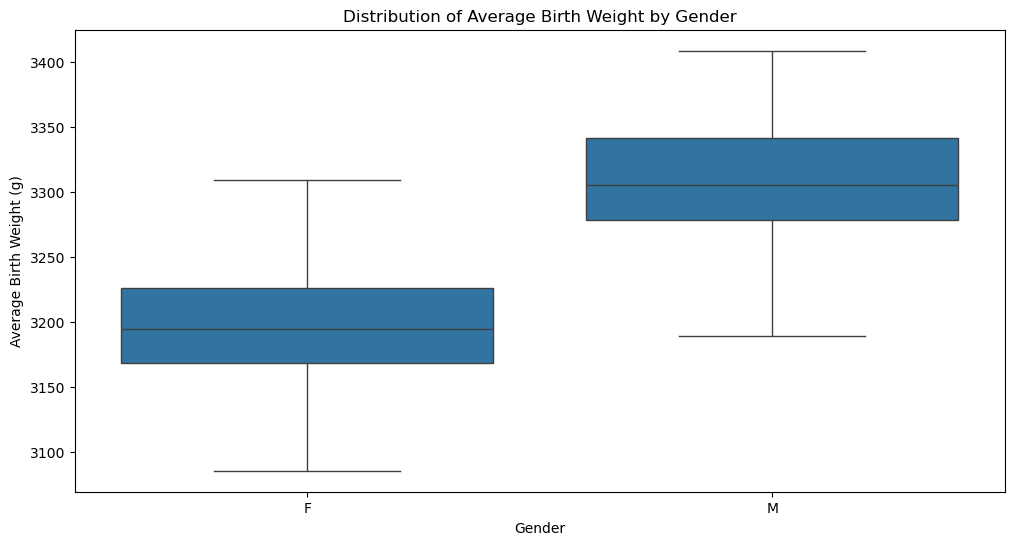

In [24]:
# Create Analysis Visualization: Box plot
# This visualization will help us compare the distribution of birth weights between genders

# Set up the figure size for better visibility
plt.figure(figsize=(12, 6))

# Create a box plot using seaborn
# x-axis: Gender (M/F)
# y-axis: Average Birth Weight in grams
# data: Using the grouped_data DataFrame we created earlier
sns.boxplot(x='Gender', y='Average Birth Weight (g)', data=grouped_data)

# Set a descriptive title for the plot
plt.title('Distribution of Average Birth Weight by Gender')

# Add labels to axes for clarity
plt.xlabel('Gender')
plt.ylabel('Average Birth Weight (g)')

# Save the plot to the Visuals folder
plt.savefig('../Visuals/whisker_plot_birth_weights.png')

# Display the plot
plt.show()

# This box plot will show:
# - The median birth weight for each gender
# - The interquartile range (IQR) of birth weights
# - Any outliers in the data
# It will help us visually assess if there are significant differences in birth weights between genders

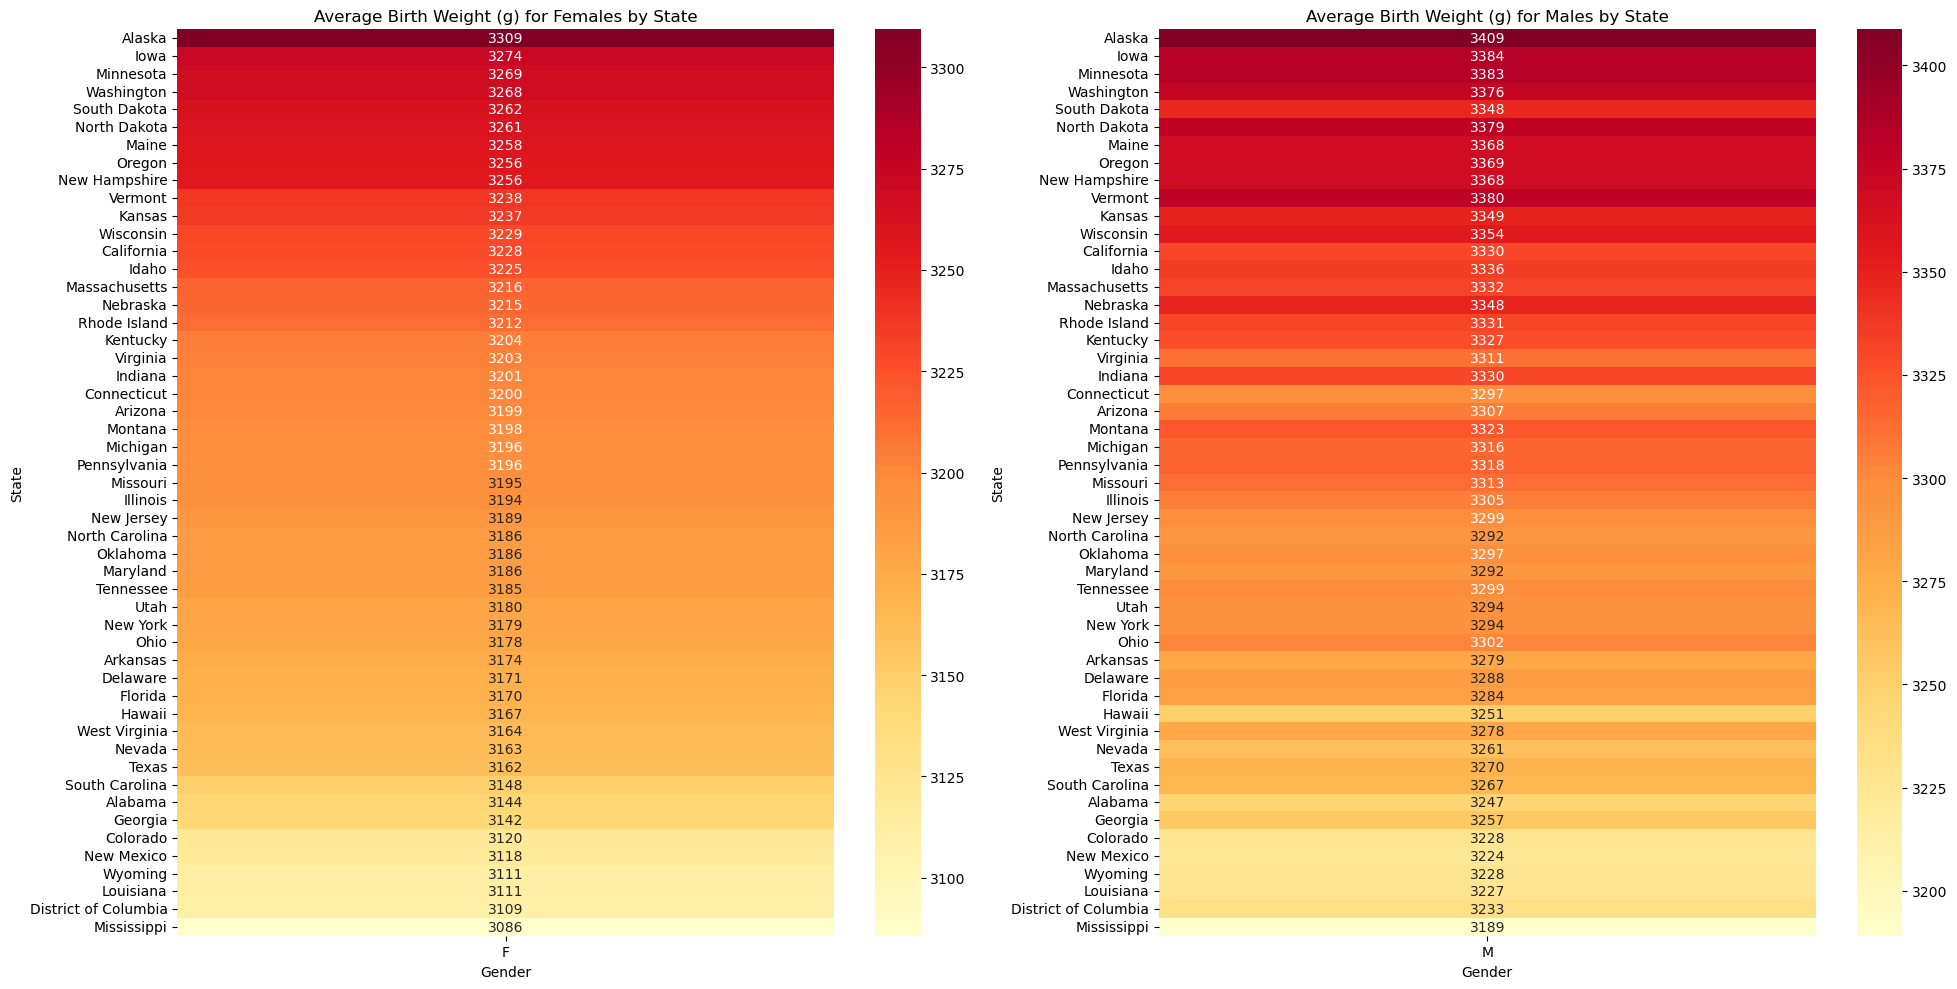

In [25]:
# Visualization: Heatmaps for Average Birth Weight by Gender and State
# This visualization will help us compare birth weights across states for both genders

# Sort the pivot_data by birth weight values
pivot_data_sorted = pivot_data.sort_values(by=['F', 'M'], ascending=False)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Heatmap for Females
sns.heatmap(pivot_data_sorted[['F']], ax=ax1, cmap='YlOrRd', annot=True, fmt='.0f')
ax1.set_title('Average Birth Weight (g) for Females by State')
# YlOrRd colormap: Yellow (lower values) to Red (higher values)
# annot=True: Display the values in each cell
# fmt='.0f': Format the values as integers

# Heatmap for Males
sns.heatmap(pivot_data_sorted[['M']], ax=ax2, cmap='YlOrRd', annot=True, fmt='.0f')
ax2.set_title('Average Birth Weight (g) for Males by State')
# Using the same colormap and formatting for consistency

# Adjust the layout to prevent overlap
plt.tight_layout()

# Save the figure to the Visuals folder
plt.savefig('../Visuals/heatmap_birth_weights.png')

# Display the plot
plt.show()

# This visualization allows us to:
# 1. Quickly identify states with higher or lower birth weights for each gender
# 2. Compare patterns between male and female birth weights across states
# 3. Spot any regional trends or anomalies in birth weights
# 4. Observe the distribution of birth weights from highest to lowest across states

# US Birth Data Analysis (2016-2021) - Conclusion & Key Findings

## 1. Regional Birth Trends

- The ANOVA test revealed statistically significant differences in birth rates among US regions (F-statistic: 867.3104, p-value: 1.2196e-46).
- This suggests that geographical factors play a crucial role in birth rate variations across the country.

## 2. Regional Growth Rates

- Compound Annual Growth Rate (CAGR) analysis showed varying trends across regions:
  - Some regions experienced positive growth (e.g., Mountain, South Atlantic)
  - Others saw negative growth (e.g., East North Central, Middle Atlantic)
- The overall CAGR for the entire country was negative, indicating a general decline in birth rates from 2016 to 2021.

## 3. Birth Weight Analysis by Gender and State

- Consistent differences in birth weights between males and females were observed across states.
- Male infants generally had higher birth weights compared to female infants.
- The box plot visualization showed:
  - A clear separation between male and female birth weight distributions
  - Slightly larger variability in male birth weights
- Heatmap analysis revealed:
  - Variations in birth weights across states for both genders
  - Some states consistently ranked higher or lower in birth weights for both genders
  - Midwestern states generally had higher birth weights compared to other regions

## 4. State-Level Birth Trends

- A choropleth map visualization highlighted significant variations in average annual births across states.
- The top 10 states with the highest average births were identified, with California, Texas, and New York leading the list.

## 5. Educational and Age Factors

- The analysis included visualizations of birth rates by mother's education level and age, suggesting these factors influence birth trends.
- A positive correlation was observed between mother's age and birth weight.

## CONCLUSION

These findings have important implications for public health policy, healthcare resource allocation, and demographic research. The significant regional and state-level variations in birth rates and birth weights suggest the need for tailored approaches to maternal and infant health care across different parts of the United States.